<a href="https://colab.research.google.com/github/talalba/mixed_data_retail/blob/master/main_Image_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the necessary packages
from sklearn.model_selection import train_test_split
from keras.layers.core import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import concatenate
import numpy as np
import argparse
import locale
import os
import pandas as pd
import csv
import glob
import os
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.io import imread
from sklearn.model_selection import train_test_split
from pandas import read_excel
import cv2
import pathlib
import multiprocessing
from joblib import Parallel, delayed
num_cores = multiprocessing.cpu_count()
# from models import models
import importlib
import locale
from random import randrange
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
# drive.mount('/content/drive')
import gzip



Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
directoryPath = '/content/drive/My Drive/'
image_path = '/content/drive/My Drive//Colab Notebooks/images2/'
# ! ls /content/drive/My\ Drive/
data_all = pd.read_pickle(directoryPath+'dbo.data_all3.pkl')
# f = gzip.GzipFile(directoryPath+'data_images.npy.gz', "r")
# data_images = np.load(f)
# train_data_with_images = pd.read_pickle(directoryPath+'dbo.train_data_with_images.pkl')
target_variable = 'CPM'

# train_data = data_all[['Id_x','Impressions','AveragePosition','Sold','Rating',target_variable]]
train_data = data_all[['Id_x',target_variable,'Title']]
train_data = train_data.loc[train_data[target_variable]>0]
train_data = train_data.dropna()
np.save(directoryPath+'train_data_saved',train_data)


In [0]:
# loading training images and resize
train_img = []
id = []
heights = []
widths = []
i=0
for img_name in tqdm(train_data['Id_x'].values.astype(str)):
    # defining the image path
    path = image_path + img_name + '.jpg'
    try:
        # reading the image
        img = cv2.imread(path)
        heights.append(img.shape[0])
        widths.append(img.shape[1])
        # normalizing the pixel values
        # converting the type of pixel to float 32
        # img = img.astype('float32')
        # appending the image into the list
        img = cv2.resize(img, (128, 128))
        img = img/255.0
        train_img.append(img)
        id.append(img_name)
    except:
        pass

data_images =  np.array(train_img)
len(data_images)
len(id)
# type(data_images[1,1,1][0])
np.save(directoryPath+'data_images_saved', data_images)

data_images = np.load(directoryPath+'data_images_saved')

In [0]:
train_data_with_images = train_data.loc[train_data['Id_x'].isin(id)]

df = train_data_with_images.drop(['Id_x'],axis=1)

# df['CPM'] = np.log(df['CPM'])
images = data_images

split = train_test_split(df, images, test_size=0.4, random_state=42)
(trainAttrX, testAttrX, trainImagesX, testImagesX) = split


# cs = MinMaxScaler()
# trainX = cs.fit_transform(trainAttrX.drop([target_variable],axis=1))
# testX = cs.transform(testAttrX.drop([target_variable],axis=1))

# trainX = trainAttrX.drop([target_variable],axis=1).values
# testX = testAttrX.drop([target_variable],axis=1).values


# trainX.shape
# testX.shape

# trainAttrX[target_variable] = np.log(trainAttrX[target_variable])

maxPrice = trainAttrX[target_variable].max()
trainY = (trainAttrX[target_variable]/ maxPrice).values
testY = (testAttrX[target_variable]/ maxPrice).values

# trainY = (trainAttrX[target_variable]).values
# testY = (testAttrX[target_variable]).values


In [8]:
print(data_images.shape)
print(train_data_with_images.shape)

(266, 128, 128, 3)
(266, 3)


In [0]:
# # import the necessary packages
# from keras.models import Sequential
# from keras.layers.normalization import BatchNormalization
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
# from keras.layers.core import Activation
# from keras.layers.core import Dropout
# from keras.layers.core import Dense
# from keras.layers import Flatten
# from keras.layers import Input
# from keras.models import Model
# def create_cnn(width, height, depth, filters=(16, 32, 64), regress=False):
# 	# initialize the input shape and channel dimension, assuming
# 	# TensorFlow/channels-last ordering
# 	inputShape = (height, width, depth)
# 	chanDim = -1

# 	# define the model input
# 	inputs = Input(shape=inputShape)

# 	# loop over the number of filters
# 	for (i, f) in enumerate(filters):
# 		# if this is the first CONV layer then set the input
# 		# appropriately
# 		if i == 0:
# 			x = inputs

# 		# CONV => RELU => BN => POOL
# 		x = Conv2D(f, (3, 3), padding="same")(x)
# 		x = Activation("relu")(x)
# 		x = BatchNormalization(axis=chanDim)(x)
# 		x = MaxPooling2D(pool_size=(2, 2))(x)
# 		# flatten the volume, then FC => RELU => BN => DROPOUT
# 		x = Flatten()(x)
# 		x = Dense(16)(x)
# 		x = Activation("relu")(x)
# 		x = BatchNormalization(axis=chanDim)(x)
# 		x = Dropout(0.5)(x)

# 		# apply another FC layer, this one to match the number of nodes
# 		# coming out of the MLP
# 		x = Dense(4)(x)
# 		x = Activation("relu")(x)

# 		# check to see if the regression node should be added
# 		if regress:
# 			x = Dense(1, activation="linear")(x)

# 		# construct the CNN
# 		model = Model(inputs, x)

# 		# return the CNN
# 		return model


In [0]:
def create_cnn():
  import keras
  from keras.models import Sequential
  from keras.layers import Dense, Dropout, Flatten,BatchNormalization
  from keras.layers import Conv2D, MaxPooling2D
  from keras.callbacks import ModelCheckpoint
  from keras.models import model_from_json
  from keras import backend as K
  from keras.datasets import mnist
  import numpy as np
  # opt=keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
  input_shape = (128,128,3)
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Conv2D(256, (3, 3), activation='relu'))
  # model.add(MaxPooling2D(pool_size=(2, 2)))
  # model.add(Conv2D(512, (3, 3), activation='relu'))
  # model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  # model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  # model.add(Dropout(0.25))
  model.add(Dense(20, activation='relu'))
  # model.add(Dropout(0.5))
  # model.add(Dense(1))

  return model
# model.compile(loss=keras.losses.mean_absolute_error,
#               optimizer=keras.optimizers.Adam(),
#               metrics=['mae'])

# # model.compile(loss="mean_absolute_percentage_error", optimizer=opt)
# # train the model
# print("[INFO] training model...")
# # model.fit(trainImagesX, trainY, validation_data=(testImagesX, testY),
# # 	epochs=20, batch_size=8)
# # preds = model.predict(testImagesX)

# model.fit(images, df[target_variable],
# 	epochs=20, batch_size=8,verbose=0)
# preds = model.predict(images)


In [10]:
import re
import nltk
import keras
nltk.download('stopwords')
from nltk.corpus import stopwords 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding

stop_words = nltk.corpus.stopwords.words('english')

def clean_text(x):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', x)
    return x
def text_lowercase(text): 
    return text.lower() 

def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

def remove_punctuation(text): 
    translator = str.maketrans('', '', string.punctuation) 
    return text.translate(translator) 

def remove_whitespace(text): 
    return  " ".join(text.split()) 

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
  
# remove stopwords function 
def remove_stopwords(text): 
    stop_words = set(stopwords.words("english")) 
    word_tokens = word_tokenize(text) 
    filtered_text = [word for word in word_tokens if word not in stop_words] 
    return filtered_text 

docs = df['Title'].str.lower().values
docs = [clean_text(text) for text in docs]
docs = [remove_whitespace(text) for text in docs]
docs = [clean_numbers(text) for text in docs]
docs = [docs for docs in docs if docs not in stop_words]


word_list = [i.split() for i in docs]


# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(word_list)
norm_corpus = word_list
word2id = t.word_index
word2id['PAD'] = 0

vocab_size = len(word2id)

encoded_docs = [one_hot(d, vocab_size) for d in docs]

doc_length = [len(item) for item in encoded_docs]
# plt.hist(doc_length,100)

type(encoded_docs)
 # pad documents to a max length of 4 words
max_length = np.int(np.ceil(np.mean(doc_length)))

padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
len(padded_docs)
padded_docs.shape


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[[ 735  976  870 ...   23  683 1164]
 [1110  580 1303 ...  983 1150    0]
 [ 590   74  181 ... 1349  501    0]
 ...
 [ 246  557  810 ...  302  436  794]
 [1389 1358  336 ...  321 1079    0]
 [ 321   15   20 ...   20 1112  580]]


(266, 12)

In [0]:
def create_text_model(vocab_size,embedding_length,max_length):
  # define the model
  model = Sequential()
  model.add(Embedding(vocab_size, embedding_length, input_length=max_length))
  model.add(Flatten())
  model.add(Dense(40, activation='relu'))
  model.add(Dense(10, activation='relu'))
  # model.add(Dense(1, activation='linear'))

  return model


In [12]:
embedding_length = 4
mlp = create_text_model(vocab_size,
embedding_length,max_length)
cnn = create_cnn()

# create the input to our final set of layers as the *output* of both
# the MLP and CNN
combinedInput = concatenate([mlp.output, cnn.output])

# our final FC layer head will have two dense layers, the final one
# being our regrxession head
x = Dense(4, activation="relu")(combinedInput)
x = Dense(1, activation="linear")(x)

# our final model will accept categorical/numerical data on the MLP
# input and images on the CNN input, outputting a single value (the
# predicted price of the house)
model = Model(inputs=[mlp.input, cnn.input], outputs=x)


model.compile(loss=keras.losses.mean_absolute_error,
              optimizer=keras.optimizers.Adam(),
              metrics=['mae'])


x = Dense(4, activation="relu")(cnn.output)
x = Dense(1, activation="linear")(x)

model_cnn = Model(inputs=[cnn.input], outputs=x)


model_cnn.compile(loss=keras.losses.mean_absolute_error,
              optimizer=keras.optimizers.Adam(),
              metrics=['mae'])



x = Dense(4, activation="relu")(mlp.output)
x = Dense(1, activation="linear")(x)

model_text = Model(inputs=[mlp.input], outputs=x)


model_text.compile(loss=keras.losses.mean_absolute_error,
              optimizer=keras.optimizers.Adam(),
              metrics=['mae'])

# model.compile(loss="mean_absolute_percentage_error", optimizer=opt)
# train the model
print("[INFO] training model...")
# model.fit(trainImagesX, trainY, validation_data=(testImagesX, testY),
# 	epochs=20, batch_size=8)
# preds = model.predict(testImagesX)

# model.fit(images, df[target_variable],
# 	epochs=20, batch_size=8,verbose=0)
# preds = model.predict([images,)


[INFO] training model...


In [13]:
model.fit([padded_docs,images], df[target_variable].values,epochs=20, batch_size=8)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/20
266/266 [==============================] - 17s 63ms/step - loss: 2582.2698 - mae: 2582.2698
Epoch 2/20
266/266 [==============================] - 16s 59ms/step - loss: 2394.2037 - mae: 2394.2031
Epoch 3/20
266/266 [==============================] - 16s 59ms/step - loss: 2282.6395 - mae: 2282.6396
Epoch 4/20
266/266 [==============================] - 16s 59ms/step - loss: 2080.7610 - mae: 2080.7607
Epoch 5/20
266/266 [==============================] - 15s 58ms/step - loss: 1974.5080 - mae: 1974.5079
Epoch 6/20
266/266 [==============================] - 16s 59ms/step - loss: 1765.0989 - mae: 1765.0991
Epoch 7/20
266/266 [==============================] - 16s 58ms/step - loss: 1618.4886 - mae: 1618.4889
Epoch 8/20
266/266 [==============================] - 15s 58ms/step - loss: 1439.7590 - mae: 1439.7589
Epoch 9/20
266/266 [==============================] - 16s 59ms/step - loss: 1301.2541 - mae: 1301.2542
Epoch 10/20
266/266 [==============================] - 15s 58ms/step - lo

In [15]:
model_cnn.fit([images], df[target_variable].values,epochs=20, batch_size=8)

Epoch 1/20
266/266 [==============================] - 16s 59ms/step - loss: 692.8138 - mae: 692.8137
Epoch 2/20
266/266 [==============================] - 16s 59ms/step - loss: 585.2179 - mae: 585.2179
Epoch 3/20
266/266 [==============================] - 16s 59ms/step - loss: 605.0182 - mae: 605.0182
Epoch 4/20
266/266 [==============================] - 16s 59ms/step - loss: 522.2416 - mae: 522.2417
Epoch 5/20
266/266 [==============================] - 16s 59ms/step - loss: 579.7874 - mae: 579.7874
Epoch 6/20
266/266 [==============================] - 16s 59ms/step - loss: 510.6666 - mae: 510.6665
Epoch 7/20
266/266 [==============================] - 16s 59ms/step - loss: 552.1242 - mae: 552.1241
Epoch 8/20
266/266 [==============================] - 16s 59ms/step - loss: 567.9968 - mae: 567.9968
Epoch 9/20
266/266 [==============================] - 16s 59ms/step - loss: 555.8028 - mae: 555.8028
Epoch 10/20
266/266 [==============================] - 16s 59ms/step - loss: 523.6885 - mae

In [18]:
model_text.fit([padded_docs], df[target_variable].values,epochs=100, batch_size=8)

Epoch 1/100
266/266 [==============================] - 0s 225us/step - loss: 165.9018 - mae: 165.9018
Epoch 2/100
266/266 [==============================] - 0s 156us/step - loss: 168.0840 - mae: 168.0840
Epoch 3/100
266/266 [==============================] - 0s 156us/step - loss: 163.9233 - mae: 163.9233
Epoch 4/100
266/266 [==============================] - 0s 165us/step - loss: 163.3182 - mae: 163.3182
Epoch 5/100
266/266 [==============================] - 0s 157us/step - loss: 157.4690 - mae: 157.4690
Epoch 6/100
266/266 [==============================] - 0s 161us/step - loss: 157.3687 - mae: 157.3687
Epoch 7/100
266/266 [==============================] - 0s 155us/step - loss: 153.8234 - mae: 153.8233
Epoch 8/100
266/266 [==============================] - 0s 161us/step - loss: 156.4008 - mae: 156.4008
Epoch 9/100
266/266 [==============================] - 0s 168us/step - loss: 157.8293 - mae: 157.8292
Epoch 10/100
266/266 [==============================] - 0s 156us/step - loss: 155.

In [0]:
# model.save(directoryPath+'/'+'model.h5')
# model_cnn.save(directoryPath+'/'+'model_cnn.h5')
# model_text.save(directoryPath+'/'+'model_text.h5')

model = keras.models.load_model(directoryPath+'model.h5')
model_cnn = keras.models.load_model(directoryPath+'model_cnn.h5')
model_text = keras.models.load_model(directoryPath+'model_text.h5')




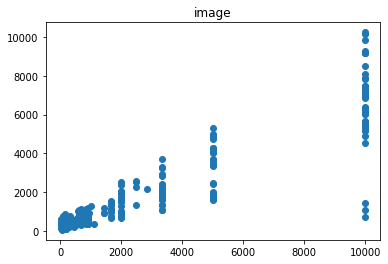

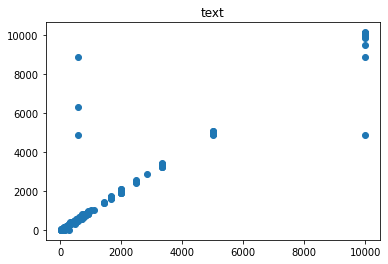

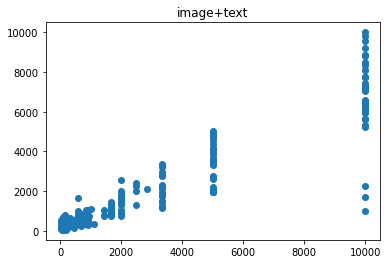

In [52]:
preds_cnn = model_cnn.predict([images])
preds_text = model_text.predict([padded_docs])
preds = model.predict([padded_docs,images])

plt.scatter(df[target_variable],preds_cnn.flatten())
plt.title("image")
plt.show()

plt.scatter(df[target_variable],preds_text.flatten())
plt.title("text")
plt.show()

plt.scatter(df[target_variable],preds.flatten())
plt.title("image+text")
plt.show()


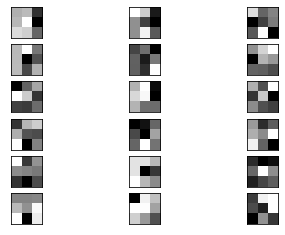

In [47]:
from keras.applications.vgg16 import VGG16
from matplotlib import pyplot
# load the model
# retrieve weights from the second hidden layer
filters, biases = model.layers[7].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [28]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
from vis.utils import utils
# !pip3 install scipy --user
# !pip install scipy==1.1.0
from vis.visualization import get_num_filters
from vis.visualization import visualize_activation

# The name of the layer we want to visualize
# You can see this in the model definition.
layer_name = 'conv2d_1'
layer_idx = utils.find_layer_idx(model, layer_name)

# Visualize all filters in this layer.
filters = np.arange(get_num_filters(model.layers[layer_idx]))

# Generate input image for each filter.
vis_images = []
for idx in filters:
    img = visualize_activation(model, layer_idx, filter_indices=idx)
    
    # Utility to overlay text on image.
    img = utils.draw_text(img, 'Filter {}'.format(idx))    
    vis_images.append(img)

# Generate stitched image palette with 8 cols.
stitched = utils.stitch_images(vis_images, cols=8)    
plt.axis('off')
plt.imshow(stitched)
plt.title(layer_name)
plt.show()

ImportError: ignored

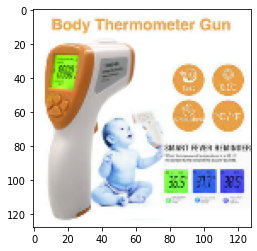

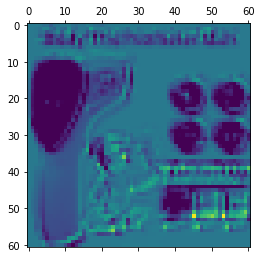

In [34]:
# visualize image in hidden layers
from keras import models

layer_outputs = [layer.output for layer in model.layers[:11]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

no = 5
img_tensor = images[no,:,:,:]
plt.imshow(images[no,:,:,:])
img_tensor = np.expand_dims(img_tensor, axis=0)

np.expand_dims(padded_docs[no,], axis=0).shape

img_tensor.shape
[padded_docs[no,:],img_tensor]
activations = activation_model.predict([np.expand_dims(padded_docs[no,], axis=0),img_tensor]) 

first_layer_activation = activations[4]

plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')



conv2d_1_input (1, 128, 128, 3) 


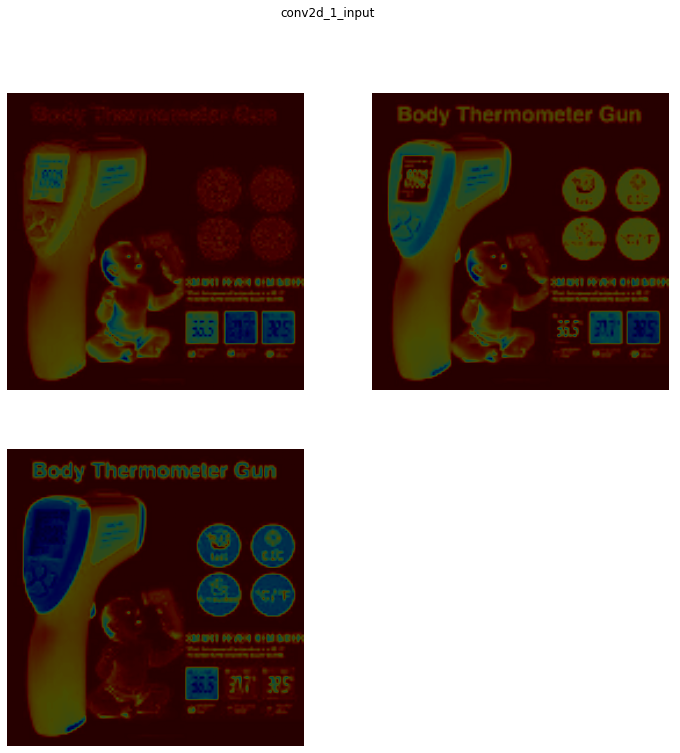

conv2d_1 (1, 126, 126, 32) 


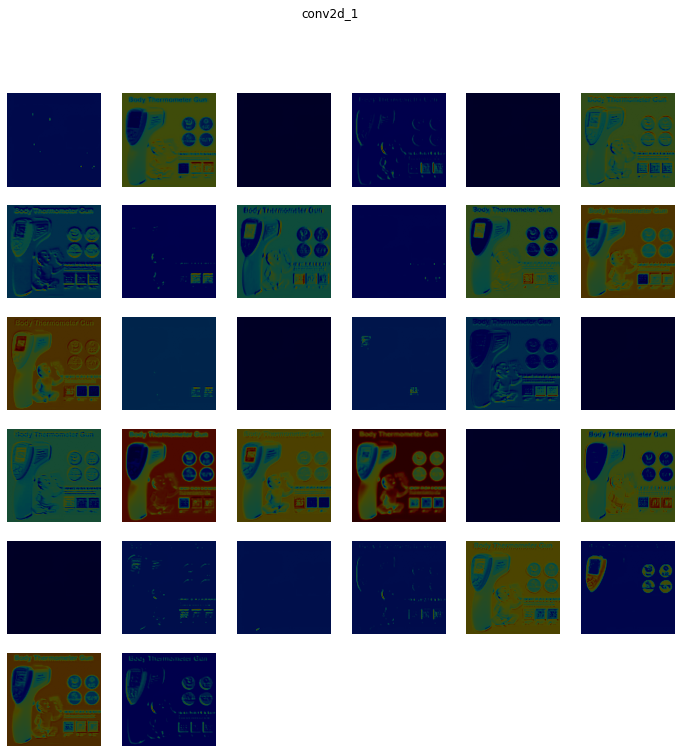

batch_normalization_1 (1, 126, 126, 32) 


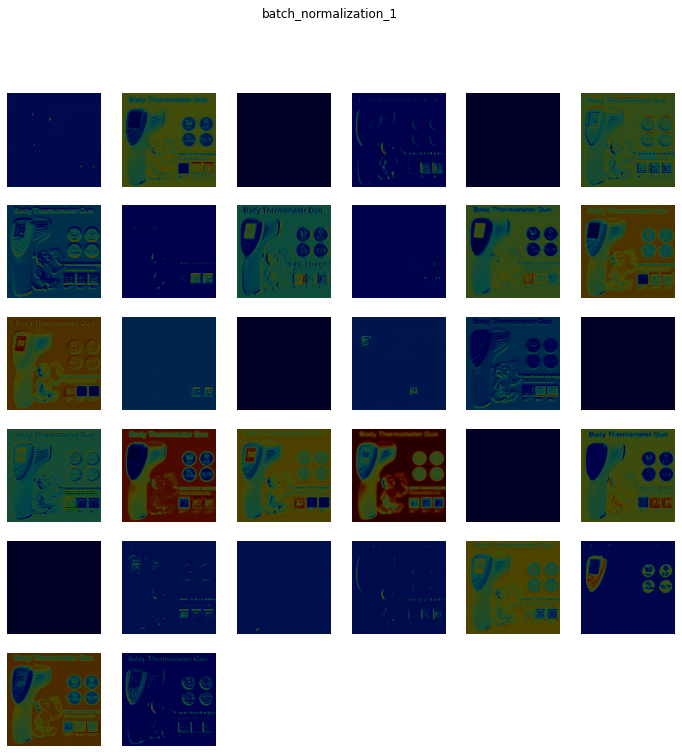

max_pooling2d_1 (1, 63, 63, 32) 


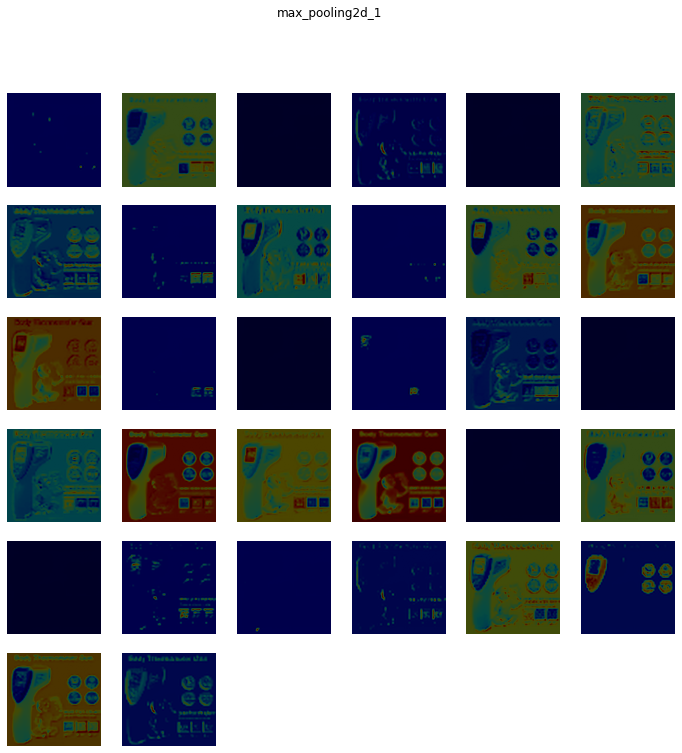

conv2d_2 (1, 61, 61, 64) 


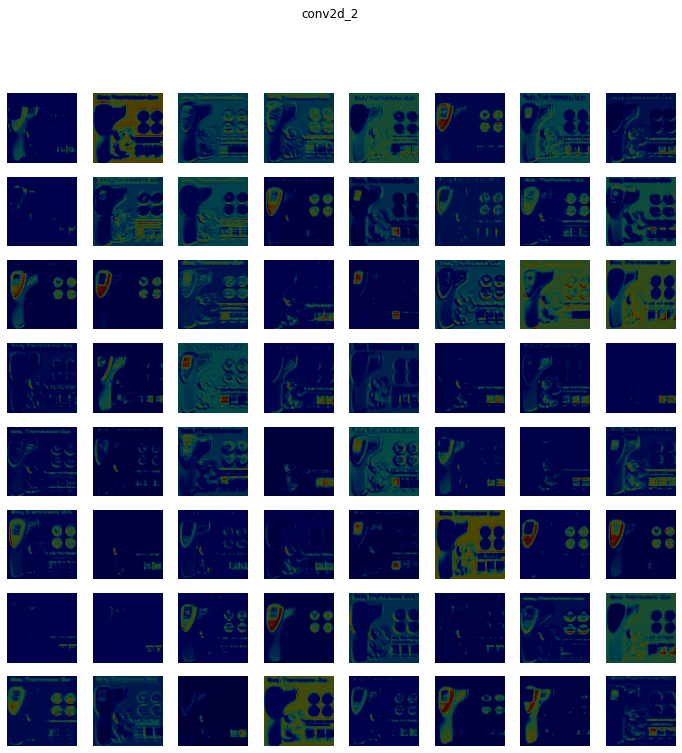

batch_normalization_2 (1, 61, 61, 64) 


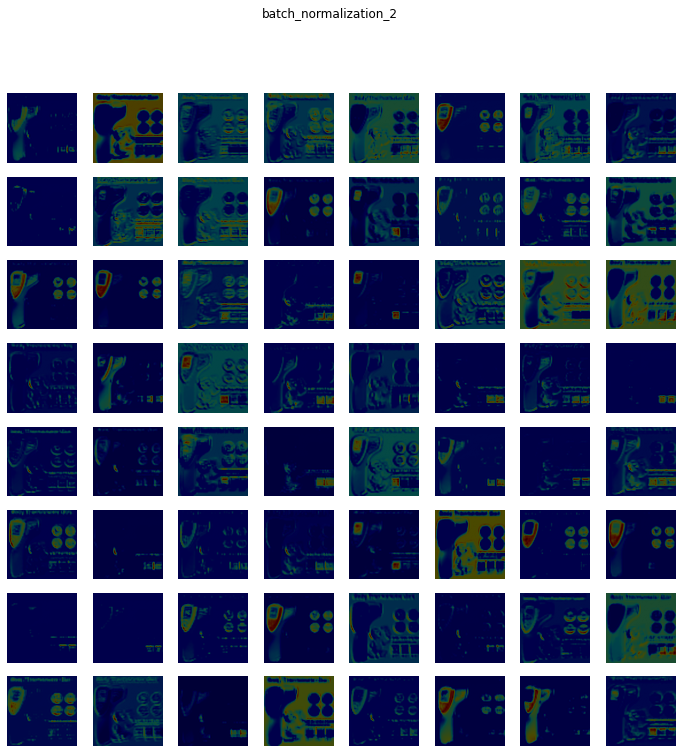

max_pooling2d_2 (1, 30, 30, 64) 


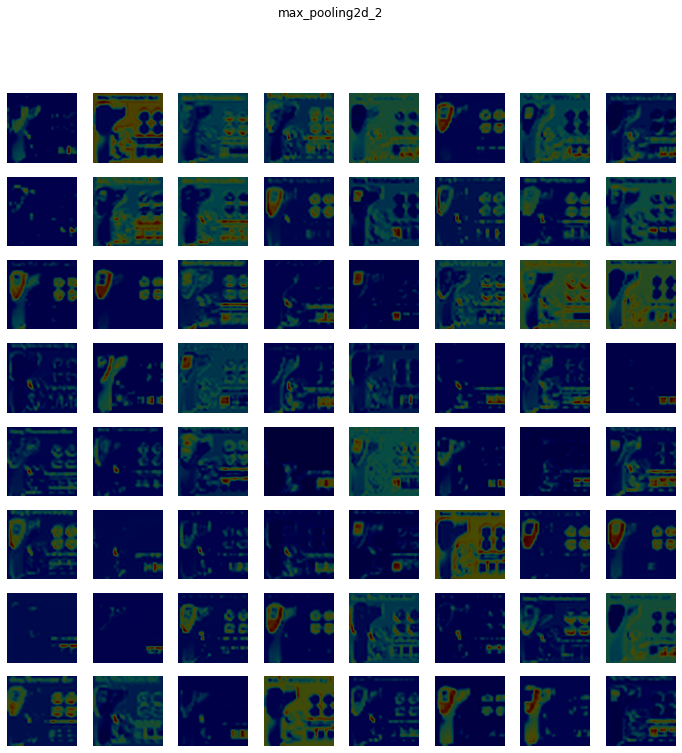

conv2d_3 (1, 28, 28, 128) 


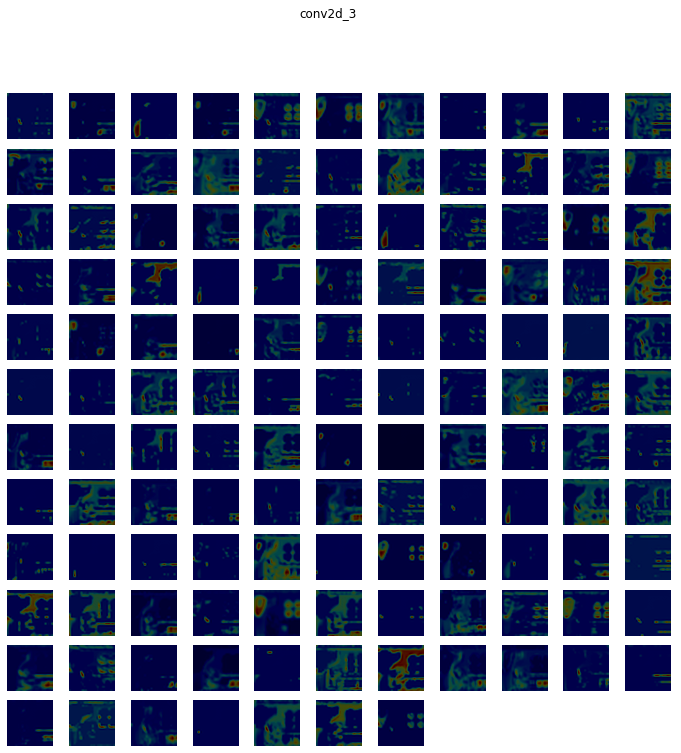

batch_normalization_3 (1, 28, 28, 128) 


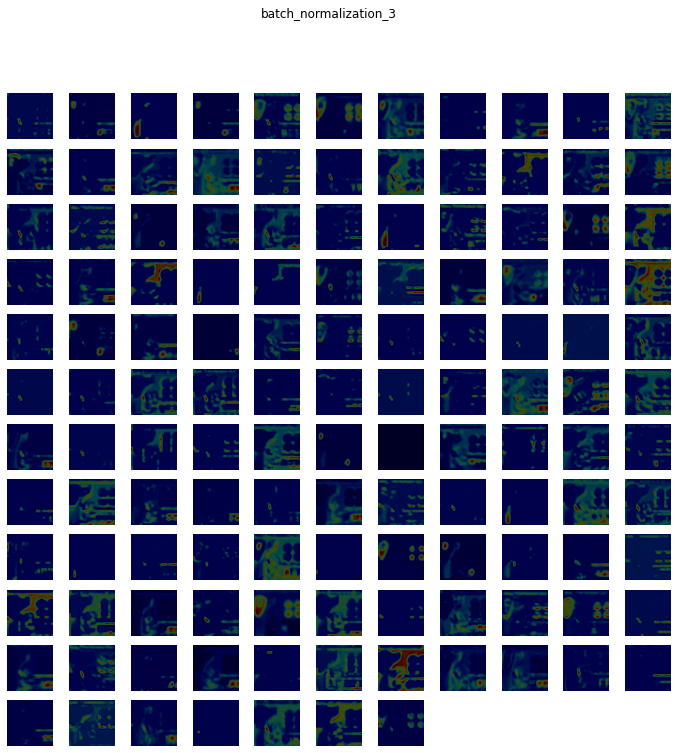

max_pooling2d_3 (1, 14, 14, 128) 


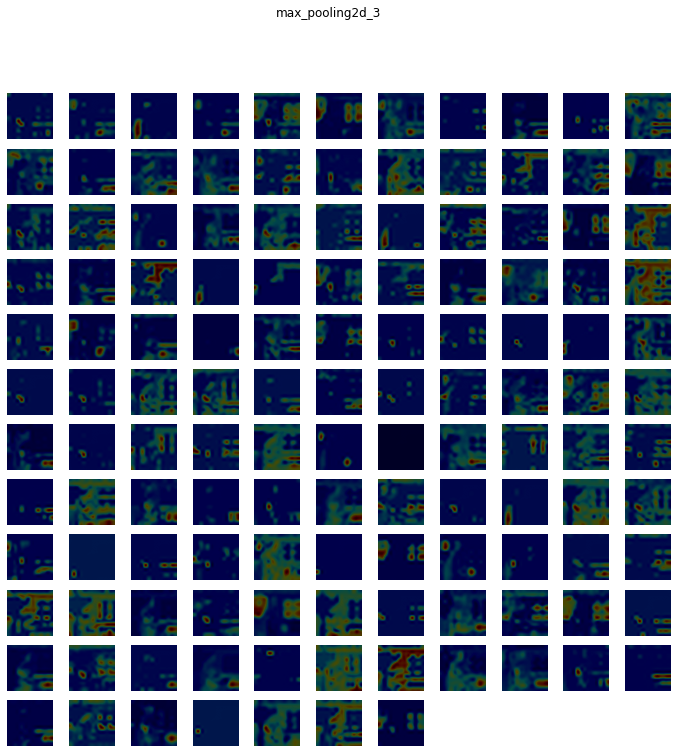

flatten_2 (1, 25088) -> Skipped. 2D Activations.
dense_3 (1, 512) -> Skipped. 2D Activations.
dense_4 (1, 256) -> Skipped. 2D Activations.
dense_5 (1, 20) -> Skipped. 2D Activations.
dense_8 (1, 4) -> Skipped. 2D Activations.
dense_9 (1, 1) -> Skipped. 2D Activations.


In [42]:
# !pip install keract
from keract import get_activations, display_heatmaps


no = 5
# img_tensor = images[no,:,:,:]
# # plt.imshow(images[no,:,:,:])
# img_tensor = np.expand_dims(img_tensor, axis=0)

# np.expand_dims(padded_docs[no,], axis=0).shape

# img_tensor.shape
keract_inputs = np.expand_dims(images[no,:,:,:], axis=0)
keract_inputs = [np.expand_dims(padded_docs[no,], axis=0)]

# keract_inputs = [np.expand_dims(padded_docs[no,], axis=0),np.expand_dims(images[no,:,:,:], axis=0)]
activations = get_activations(model_cnn, keract_inputs)
display_heatmaps(activations, keract_inputs, save=False)

embedding_1_input (1, 12) -> Skipped. 2D Activations.
embedding_1 (1, 12, 4) 


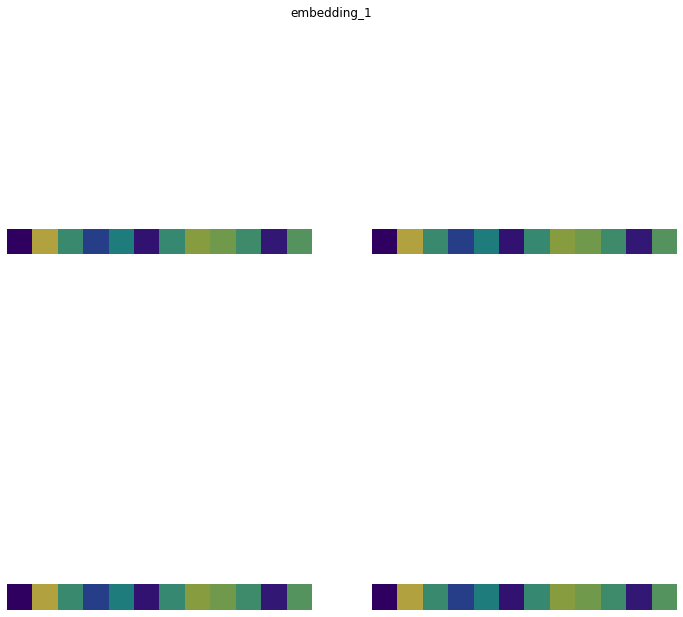

flatten_1 (1, 48) -> Skipped. 2D Activations.
dense_1 (1, 40) -> Skipped. 2D Activations.
dense_2 (1, 10) -> Skipped. 2D Activations.
dense_10 (1, 4) -> Skipped. 2D Activations.
dense_11 (1, 1) -> Skipped. 2D Activations.


In [44]:
keract_inputs = np.expand_dims(padded_docs[no,], axis=0)

# keract_inputs = [np.expand_dims(padded_docs[no,], axis=0),np.expand_dims(images[no,:,:,:], axis=0)]
activations = get_activations(model_text, keract_inputs)
display_heatmaps(activations, keract_inputs, save=False)

In [46]:
# saliency map
# import tensorflow.compat.v1 as tf
# from scipy.misc import imresize
!pip install git+git://github.com/raghakot/keras-vis.git --upgrade --no-deps
from vis.utils import utils
# model.summary()
from vis.visualization import visualize_saliency


# from tensorflow.keras import backend
# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'dense_2')

# # Swap softmax with linear
# model.layers[layer_idx].activation = activations.linear
# model = utils.apply_modifications(model)


# !pip uninstall scipy
# !pip install scipy==1.1.0



#generating saliency map with unguided backprop
grads1 = visualize_saliency(model, layer_idx,filter_indices=None,seed_input=img_tensor)
#plotting the unguided saliency map
plt.imshow(grads1,cmap='jet')

# #generating saliency map with guided backprop
# grads2 =  visualize_saliency(model, layer_idx,filter_indices=None,seed_input=img_tensor,backprop_modifier='guided')
# #plotting the saliency map as heatmap
# plt.imshow(grads2,cmap='jet')

# # # 20 is the imagenet index corresponding to `ouzel`
# grads2 = visualize_saliency(model, layer_idx,filter_indices=None,
#                             seed_input=img_tensor, backprop_modifier='guided')
# # Lets overlay the heatmap onto original image.    
# plt.imshow(grads2, cmap='jet')

  Cloning git://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-jo1kck5r
  Running command git clone -q git://github.com/raghakot/keras-vis.git /tmp/pip-req-build-jo1kck5r
  Created wheel for keras-vis: filename=keras_vis-0.5.0-py2.py3-none-any.whl size=38884 sha256=e1cd96553c70a2bc5282e5de891a6aef08cf399a96e45d9632403b77426b3023
  Stored in directory: /tmp/pip-ephem-wheel-cache-ix0azaii/wheels/ff/01/8e/3a66d951f9b53f9894a010107b05253fb9a6c6f2555a5aaeca
Successfully built keras-vis
  Found existing installation: keras-vis 0.4.1
    Uninstalling keras-vis-0.4.1:
      Successfully uninstalled keras-vis-0.4.1


In [0]:
# visualize filters

from matplotlib import pyplot
# load the model
# retrieve weights from the second hidden layer
filters, biases = model.layers[2].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

In [0]:
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

inputShape=(128,128,3)
input = Input(inputShape)

x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv1',padding='same')(input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)



x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)

x = Conv2D(32,(3,3),strides = (1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool3')(x)


x = Flatten()(x)
x = Dense(64,activation = 'relu',name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32,activation = 'relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(1)(x)

model = Model(inputs = input,outputs = x,name='Predict')

# define SGD optimizer
momentum = 0.5
sgd = SGD(lr=0.01, momentum=momentum, decay=0.0, nesterov=False) 

# compile the model
model.compile(loss='mae',optimizer=sgd, metrics=['mse'])

# lr = lr0 * drop^floor(epoch / epochs_drop)

import math
def step_decay(epoch):
    initial_lrate=0.1
    drop=0.6
    epochs_drop = 3.0
    lrate= initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate
   
lrate = LearningRateScheduler(step_decay)
callbacks_list = [ lrate]

history=model.fit(images, df[target_variable], 
                          epochs=35,callbacks=callbacks_list,verbose=1)

Epoch 1/35
270/270 [==============================] - 4s 13ms/step - loss: 423269641.6988 - mse: 34095624679891927040.0000
Epoch 2/35
270/270 [==============================] - 3s 11ms/step - loss: 304680.1458 - mse: 20364549685248.0000
Epoch 3/35
270/270 [==============================] - 3s 11ms/step - loss: 2818.2083 - mse: 19723164.0000
Epoch 4/35
270/270 [==============================] - 3s 11ms/step - loss: 97602.3961 - mse: 2425820807168.0000
Epoch 5/35
270/270 [==============================] - 3s 11ms/step - loss: 183834.2319 - mse: 8847932522496.0000
Epoch 6/35
270/270 [==============================] - 3s 11ms/step - loss: 2815.0998 - mse: 19705590.0000
Epoch 7/35
270/270 [==============================] - 3s 11ms/step - loss: 2814.4405 - mse: 19701870.0000
Epoch 8/35
270/270 [==============================] - 3s 10ms/step - loss: 2813.7925 - mse: 19698108.0000
Epoch 9/35
270/270 [==============================] - 3s 11ms/step - loss: 2813.2301 - mse: 19695080.0000
Epoch 10

KeyError: ignored

IndexError: ignored

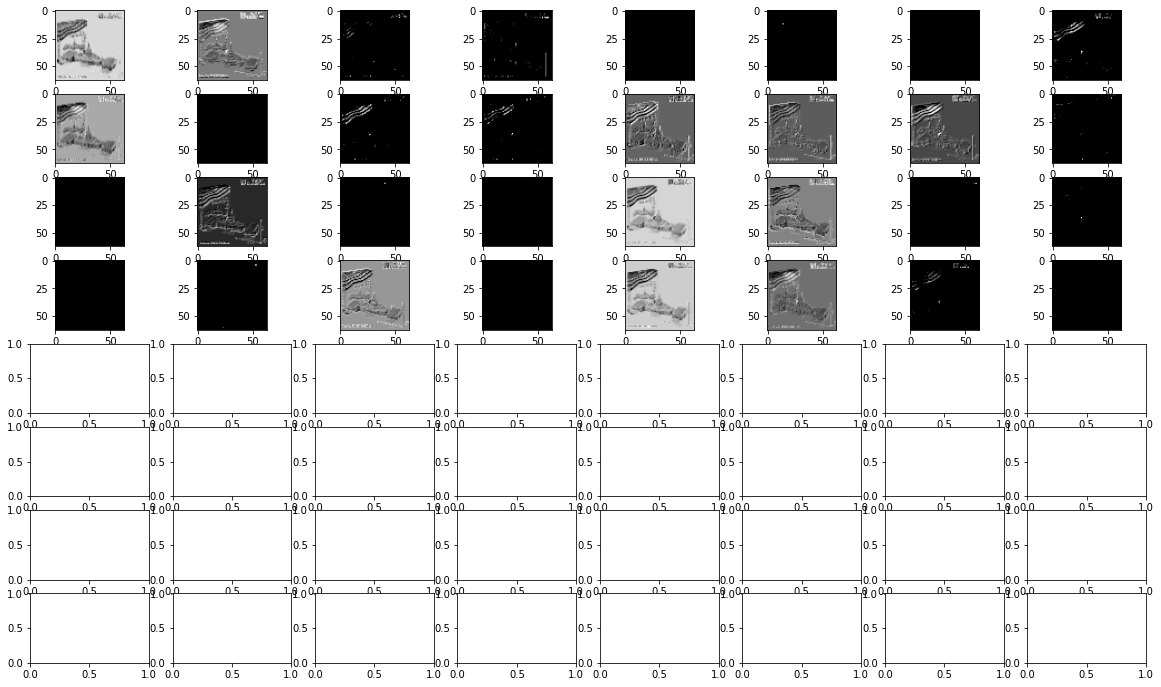

In [0]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(np.expand_dims(images[no,:,:,:], axis=0))

def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

display_activation(activations, 8, 8, 2)


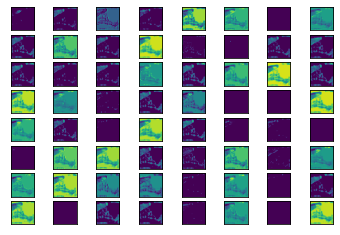

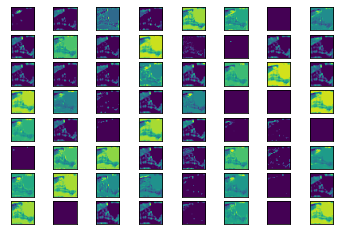

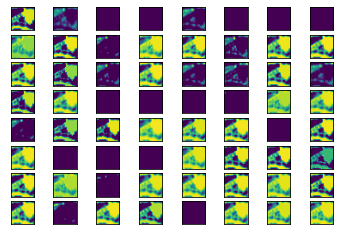

In [0]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model



no = 264
img_tensor = images[no,:,:,:]
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor.shape
plt.imshow(images[no,:,:,:])

# redefine model to output right after the first hidden layer
ixs = [2,3,4]
outputs = [model.layers[i].output for i in ixs]
model2 = Model(inputs=model.inputs, outputs=outputs)

feature_maps = model2.predict(img_tensor)
# plot the output from each block
square = 8
ixs = [2, 3,4]

for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1])
			ix += 1
	# show the figure
	pyplot.show()

In [0]:
classifier = model
layer_names = []
for layer in classifier.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [0]:
# model = create_cnn(128, 128, 3, regress=True)
# opt = Adam(lr=1e-2, decay=1e-3 / 200)

# model.compile(loss=keras.losses.mean_squared_error,
#               optimizer=keras.optimizers.Adadelta(),
#               metrics=['mse'])
# model.fit(trainImagesX, trainY, validation_data=(testImagesX, testY),
# 	epochs=3, batch_size=8)
# preds = model.predict(testImagesX)

In [0]:
# # import the necessary packages
# from keras.models import Sequential
# from keras.layers.normalization import BatchNormalization
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
# from keras.layers.core import Activation
# from keras.layers.core import Dropout
# from keras.layers.core import Dense
# from keras.layers import Flatten
# from keras.layers import Input
# from keras.models import Model
# from keras import optimizers

# model = Sequential()
# model.add(Dense(15, input_dim=trainX.shape[1], activation="relu"))
# # model.add(Dense(2, activation="relu"))
# model.add(Dense(1, activation="linear"))

# opt = Adam(lr=1e-4, decay=1e-2 / 200)
# # opt = optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False)

# model.compile(loss="mean_squared_error", optimizer=opt)
# # train the model
# print("[INFO] training model...")
# model.fit(trainX, trainY, validation_data=(testX, testY),
# 	epochs=200, batch_size=8)
# preds = model.predict(testX)
# #

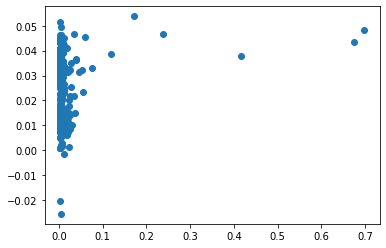

In [0]:
# plt.scatter(testY,preds.flatten())
